In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ch.bfe.thermische-netze/ch.bfe.thermische-netze.csv')

In [3]:
df

,Xtf_id,Name,Zip,Place,Operator,Contact,OperatorAddress,Phone,Web,Mail,BeginningOfOperation,Power,Energy,HouseConnections,NetLength,EnergySource1,EnergySource2,PositionAccuracy,x,y
0,tn2,Kantonales Zeughaus Aarau,5000,Aarau,Kantonale Verwaltung Militär,Kantonale Verwaltung Militär,Rohrerstrasse 7,628353100.0,https://www.holzenergie.ch,info@holzenergie.ch,1996.0,0.65,NaN,NaN,NaN,5,NaN,103,2.646630e+06,1.249437e+06
1,tn901,Wärmeverbund BiEAG Hünenberg,6331,Hünenberg,Biomasse Energie AG,Patrick Birrer,Fidern 5,417805300.0,https://www.bafu.admin.ch/bafu/de/home/themen/...,info@bieag.ch,2011.0,0.90,12500.0,47.0,16.50,5,8.0,103,2.675555e+06,1.226189e+06
2,tn1003,Holzenergieverbund Wyden,8408,Winterthur,Stadtwerk Winterthur,Stadtwerk Winterthur,Vertrieb,522674144.0,https://www.stadtwerk.winterthur.ch,stadtwerk.vertrieb@win.ch,2011.0,NaN,4000.0,NaN,NaN,5,2.0,103,2.693601e+06,1.262584e+06
3,tn1035,Energiezentrum Haltikon,6403,Haltikon,Agro Energiezentrum Rigi AG,ECOGEN Rigi Genossenschaft,Haltikon 55,418114143.0,https://www.ecogen-rigi.ch/energiezentrum/ener...,info@ecogen-rigi.ch,2020.0,20.00,60000.0,NaN,NaN,5,4.0,103,2.673940e+06,1.215632e+06
4,tn1037,Seewasserverbund Klausstrasse Zürich,8008,Zürich,ewz,ewz,"Tramstrasse 35, 8050 Zürich",583192020.0,https://www.ewz.ch/edl/de/home/projekte/seewas...,medien@ewz.ch,NaN,NaN,NaN,NaN,NaN,10,NaN,103,2.683801e+06,1.245938e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,tn555,Wärmeversorgung Adligenswil,6043,Adligenswil,ECOGEN Rigi Genossenschaft,ECOGEN Rigi Genossenschaft,Haltikon 55,418114143.0,https://www.ecogen-rigi.ch/de-ch,info@ecogen-rigi.ch,2010.0,1.20,3500.0,26.0,0.48,5,NaN,103,2.670365e+06,1.213868e+06
1073,tn1084,EnerLac,1100,Morges,Energie 360° SA,Energie 360 ° SA,Avenue de la Gare 33<br />1003 Lausanne,212130590.0,https://www.energie360.ch/fr/energie360/refere...,romandie@energie360.ch,2022.0,NaN,NaN,NaN,NaN,10,NaN,103,2.527285e+06,1.150758e+06
1074,tn1085,Fernwärme Worb - Rüfenacht,3076,Worb,BKW AEK Contracting AG,BKW AEK Contracting AG,Westbahnhofstrasse 3<br />4502 Solothurn,584775656.0,https://www.bac.ch/privatkunden/aktuelle-proje...,info@bac.ch,2019.0,9.50,NaN,NaN,6.90,5,1.0,103,2.609046e+06,1.198720e+06
1075,tn1083,AZOM,5600,Lenzburg,SWL Energie AG,SWL Energie AG,Werkhofstrasse 10,628857575.0,https://www.swl.ch/de/home,info@swl.ch,2015.0,9.14,NaN,NaN,NaN,2,5.0,103,2.655755e+06,1.248505e+06


In [4]:
df['Power'].isna().sum()

167

In [5]:
df['Energy'].isna().sum()

601

In [6]:
gdf = gpd.read_file('SHAPEFILE_LV95_LN02/swissBOUNDARIES3D_1_3_TLM_HOHEITSGEBIET.shp')

<AxesSubplot:>

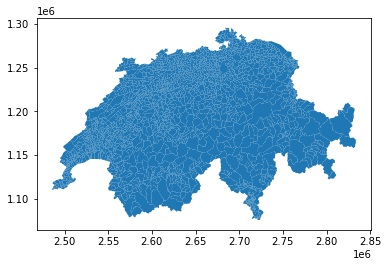

In [7]:
gdf.plot()

In [8]:
networks = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y))

In [9]:
networks.crs = gdf.crs

In [10]:
networks = networks[networks['x'].notna()]

In [11]:
join_left_df = networks.sjoin(gdf, how="left")

In [12]:
join_left_df

,Xtf_id,Name,Zip,Place,Operator,Contact,OperatorAddress,Phone,Web,Mail,...,SEE_FLAECH,REVISION_Q,NAME,KANTONSNUM,ICC,EINWOHNERZ,BFS_NUMMER,GEM_TEIL,GEM_FLAECH,SHN
0,tn2,Kantonales Zeughaus Aarau,5000,Aarau,Kantonale Verwaltung Militär,Kantonale Verwaltung Militär,Rohrerstrasse 7,628353100.0,https://www.holzenergie.ch,info@holzenergie.ch,...,NaN,2021_Aufbau,Aarau,19.0,CH,21726.0,4001,0,1234.0,CH19014001
1,tn901,Wärmeverbund BiEAG Hünenberg,6331,Hünenberg,Biomasse Energie AG,Patrick Birrer,Fidern 5,417805300.0,https://www.bafu.admin.ch/bafu/de/home/themen/...,info@bieag.ch,...,25.0,2021_Aufbau,Hünenberg,9.0,CH,8768.0,1703,0,1866.0,CH09001703
2,tn1003,Holzenergieverbund Wyden,8408,Winterthur,Stadtwerk Winterthur,Stadtwerk Winterthur,Vertrieb,522674144.0,https://www.stadtwerk.winterthur.ch,stadtwerk.vertrieb@win.ch,...,NaN,2021_Aufbau,Winterthur,1.0,CH,114220.0,230,0,6807.0,CH01100230
3,tn1035,Energiezentrum Haltikon,6403,Haltikon,Agro Energiezentrum Rigi AG,ECOGEN Rigi Genossenschaft,Haltikon 55,418114143.0,https://www.ecogen-rigi.ch/energiezentrum/ener...,info@ecogen-rigi.ch,...,681.0,2021_Aufbau,Küssnacht (SZ),5.0,CH,13531.0,1331,0,3620.0,CH05041331
4,tn1037,Seewasserverbund Klausstrasse Zürich,8008,Zürich,ewz,ewz,"Tramstrasse 35, 8050 Zürich",583192020.0,https://www.ewz.ch/edl/de/home/projekte/seewas...,medien@ewz.ch,...,395.0,2021_Aufbau,Zürich,1.0,CH,421878.0,261,0,9188.0,CH01120261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,tn555,Wärmeversorgung Adligenswil,6043,Adligenswil,ECOGEN Rigi Genossenschaft,ECOGEN Rigi Genossenschaft,Haltikon 55,418114143.0,https://www.ecogen-rigi.ch/de-ch,info@ecogen-rigi.ch,...,NaN,2021_Aufbau,Adligenswil,3.0,CH,5471.0,1051,0,699.0,CH03121051
1073,tn1084,EnerLac,1100,Morges,Energie 360° SA,Energie 360 ° SA,Avenue de la Gare 33<br />1003 Lausanne,212130590.0,https://www.energie360.ch/fr/energie360/refere...,romandie@energie360.ch,...,974.0,2021_Aufbau,Morges,22.0,CH,16101.0,5642,0,1358.0,CH22275642
1074,tn1085,Fernwärme Worb - Rüfenacht,3076,Worb,BKW AEK Contracting AG,BKW AEK Contracting AG,Westbahnhofstrasse 3<br />4502 Solothurn,584775656.0,https://www.bac.ch/privatkunden/aktuelle-proje...,info@bac.ch,...,NaN,2021_Aufbau,Worb,2.0,CH,11621.0,627,0,2108.0,CH02460627
1075,tn1083,AZOM,5600,Lenzburg,SWL Energie AG,SWL Energie AG,Werkhofstrasse 10,628857575.0,https://www.swl.ch/de/home,info@swl.ch,...,NaN,2021_Aufbau,Lenzburg,19.0,CH,11024.0,4201,0,1131.0,CH19074201


In [13]:
gb = pd.DataFrame(join_left_df.groupby(['NAME','BFS_NUMMER'])['Power'].sum()).reset_index()

In [14]:
gb

,NAME,BFS_NUMMER,Power
0,Aadorf,4551,1.65
1,Aarau,4001,24.75
2,Aarburg,4271,4.45
3,Aarwangen,321,1.10
4,Adelboden,561,7.30
...,...,...,...
641,Zufikon,4083,0.55
642,Zug,1711,19.40
643,Zurzach,4324,13.10
644,Zweisimmen,794,0.50


In [15]:
pop = gdf[['BFS_NUMMER','EINWOHNERZ']]

In [16]:
gb = gb.merge(pop,left_on='BFS_NUMMER',right_on='BFS_NUMMER')

In [17]:
gb['MW_cap'] = gb['Power']/gb['EINWOHNERZ']

In [18]:
gb

,NAME,BFS_NUMMER,Power,EINWOHNERZ,MW_cap
0,Aadorf,4551,1.65,9216.0,0.000179
1,Aarau,4001,24.75,21726.0,0.001139
2,Aarburg,4271,4.45,8577.0,0.000519
3,Aarwangen,321,1.10,4638.0,0.000237
4,Adelboden,561,7.30,3343.0,0.002184
...,...,...,...,...,...
678,Zug,1711,19.40,NaN,NaN
679,Zurzach,4324,13.10,7637.0,0.001715
680,Zurzach,4324,13.10,NaN,NaN
681,Zweisimmen,794,0.50,3032.0,0.000165


In [19]:
gdf_gb = gdf.merge(gb,how='left',left_on='BFS_NUMMER',right_on='BFS_NUMMER')

In [20]:
gdf_gb['has_thermal_network'] = False
gdf_gb.loc[gdf_gb.Power>0,'has_thermal_network'] = True

In [21]:
gdf_gb = gdf_gb[gdf_gb.has_thermal_network==True]

/var/folders/cm/9xjcsybd4yd5wlc1_7bsnwl00000gp/T/ipykernel_66566/2731800714.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_gb.to_file("shp/thermal_network.shp")


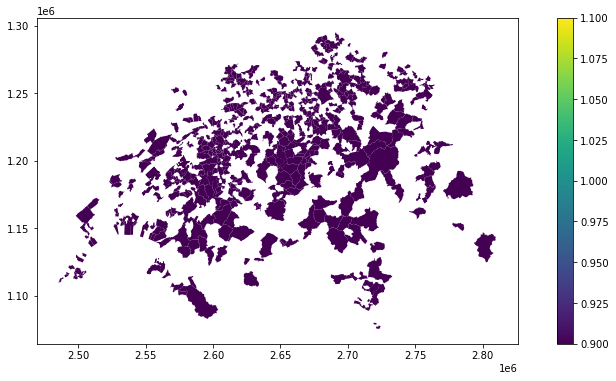

In [22]:
fig, ax = plt.subplots(figsize=(14, 6))
gdf_gb.plot(column='has_thermal_network',legend=True,ax=ax)
plt.savefig('thermal_network.pdf')
plt.savefig('thermal_network.png',dpi=1000) 
gdf_gb.to_file("shp/thermal_network.shp")